# Image Classification Using CNN

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers

In [2]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
y_train=y_train.reshape(-1)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [10]:
y_test=y_test.reshape(-1)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [11]:
classes=['aiplane','automobile','bird','cat','deer','frog','house','ship','truck']

In [12]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

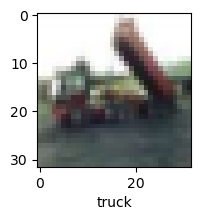

In [13]:
plot_sample(x_train,y_test,2)

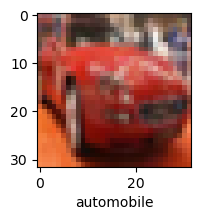

In [14]:
plot_sample(x_train,y_train,5)

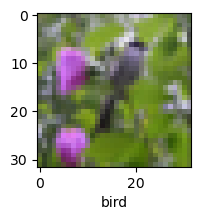

In [15]:
plot_sample(x_train,y_train,300)

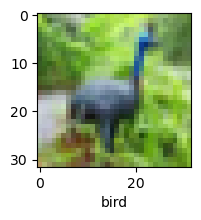

In [16]:
plot_sample(x_train,y_train,6)

In [17]:
x_train=x_train/255.0
x_test=x_test/255.0

In [18]:
#from tensorflow import keras
ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')  # Fix typo
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=5) 

C:\Users\SUJATHA\anaconda3\Anakonda\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 38ms/step - accuracy: 0.3046 - loss: 1.9334
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.4217 - loss: 1.6487
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 38ms/step - accuracy: 0.4514 - loss: 1.5565
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.4781 - loss: 1.4850
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 39ms/step - accuracy: 0.4929 - loss: 1.4385


In [49]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred=ann.predict(x_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print('classification report: \n',classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.47      0.67      0.55      1000
           1       0.57      0.68      0.62      1000
           2       0.42      0.27      0.33      1000
           3       0.34      0.42      0.38      1000
           4       0.45      0.40      0.42      1000
           5       0.40      0.36      0.38      1000
           6       0.61      0.41      0.49      1000
           7       0.50      0.59      0.54      1000
           8       0.67      0.51      0.58      1000
           9       0.51      0.58      0.54      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.48     10000
weighted avg       0.50      0.49      0.48     10000



In [50]:
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

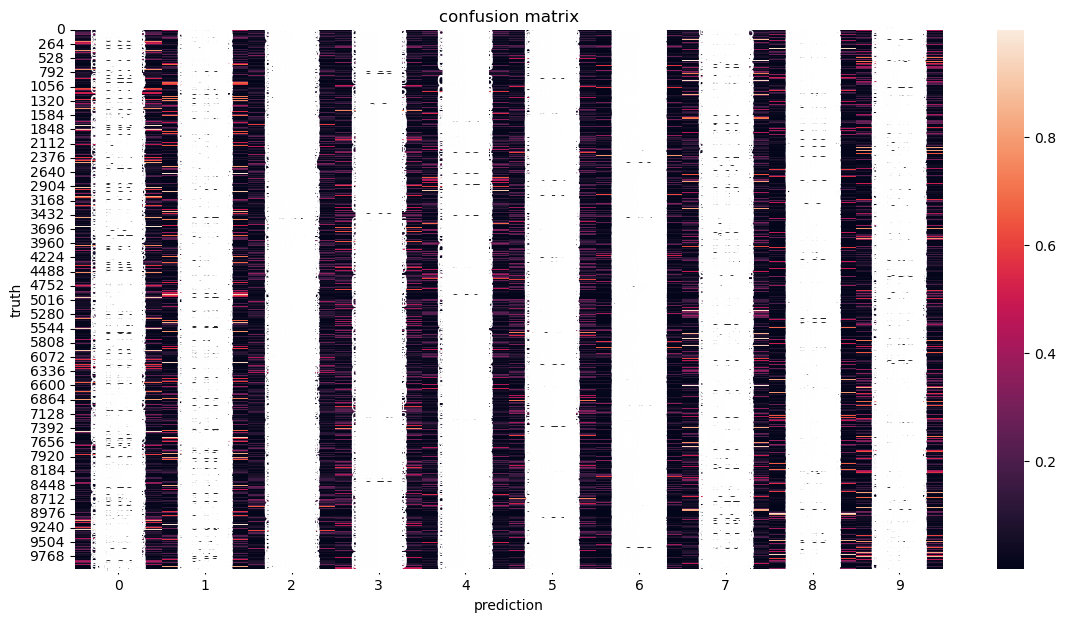

In [51]:
plt.figure(figsize=(14,7))
sns.heatmap(y_pred, annot=True)
plt.ylabel('truth')
plt.xlabel('prediction')
plt.title('confusion matrix')
plt.show

In [20]:
from tensorflow import keras
from tensorflow.keras import layers

cnn = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),  # Fix: Conv2D and kernel_size
    layers.MaxPooling2D((2,2)),  # Fix: MaxPooling2D
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),  # Fix: Conv2D and kernel_size
    layers.Flatten(),  # Fix: Flatten (not Flattern)
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

cnn.summary()  # To check model architecture


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │         692,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 712,330 (2.72 MB)

 Trainable params: 712,330 (2.72 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 19ms/step - accuracy: 0.4197 - loss: 1.5847
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.6409 - loss: 1.0293
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.7016 - loss: 0.8490
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.7493 - loss: 0.7218
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.7877 - loss: 0.6063
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.8254 - loss: 0.5020
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.8594 - loss: 0.4036
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.8926 - loss: 0.3150
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.9141 - loss: 0.2462
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.9368 - loss: 0.1893


In [22]:
cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6778 - loss: 1.3837


[1.4042822122573853, 0.6773999929428101]

In [23]:
y_pred=cnn.predict(x_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


array([[3.0174929e-10, 7.7740616e-08, 1.9104574e-08, 9.9984002e-01,
        2.8530064e-06, 1.9321342e-05, 2.9713645e-05, 8.7098355e-09,
        1.0794898e-04, 8.1962845e-09],
       [1.8817099e-02, 5.0123310e-01, 1.3898874e-08, 6.9257356e-07,
        8.8932223e-10, 3.6169298e-10, 1.4798296e-06, 1.2004640e-11,
        4.7967684e-01, 2.7077104e-04],
       [2.0153619e-01, 7.2207206e-01, 1.7378716e-05, 3.3929929e-05,
        1.0482757e-03, 8.7267748e-04, 8.6189750e-05, 2.9774755e-02,
        3.0785484e-02, 1.3773020e-02],
       [9.8970395e-01, 3.6407886e-07, 1.8287223e-04, 8.5694907e-04,
        1.3888580e-07, 9.1845626e-10, 3.2954264e-07, 7.7009510e-11,
        9.2552938e-03, 1.0441916e-08],
       [1.5118332e-11, 2.9048721e-08, 6.0853902e-03, 2.0432416e-02,
        9.7316259e-01, 2.4423560e-05, 2.9475262e-04, 1.2838836e-12,
        4.5147411e-07, 7.6234408e-11]], dtype=float32)

In [24]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 1, 0, 4]

In [25]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

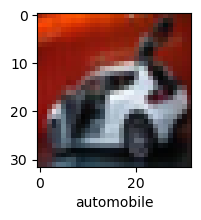

In [26]:
plot_sample(x_test,y_test,6)

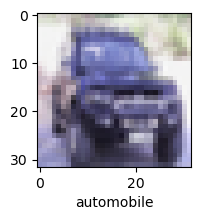

In [28]:
plot_sample(x_test,y_test,9)

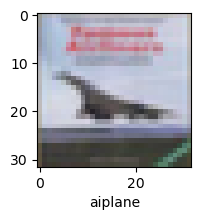

In [30]:
plot_sample(x_test,y_test,3)